<a href="https://colab.research.google.com/github/Praveer1201/food-nutrirtion-analysis/blob/main/foodnurtiention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
nutrients=pd.read_csv("/content/nutrients_csvfile.csv")
nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [ ]:
nutrients=nutrients.replace("t",0)
nutrients=nutrients.replace("t'",0)

nutrients.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [ ]:
nutrients=nutrients.replace(",","", regex=True)
nutrients['Fiber']=nutrients['Fiber'].replace("a","", regex=True)
nutrients['Calories'][91]=(8+44)/2

In [ ]:
nutrients['Grams']=pd.to_numeric(nutrients['Grams'])
nutrients['Calories']=pd.to_numeric(nutrients['Calories'])
nutrients['Protein']=pd.to_numeric(nutrients['Protein'])
nutrients['Fat']=pd.to_numeric(nutrients['Fat'])
nutrients['Sat.Fat']=pd.to_numeric(nutrients['Sat.Fat'])
nutrients['Fiber']=pd.to_numeric(nutrients['Fiber'])
nutrients['Carbs']=pd.to_numeric(nutrients['Carbs'])

In [ ]:
nutrients.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein       int64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

In [ ]:
print(nutrients.isnull().any())
print('-'*245)
print(nutrients.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein     False
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   335.000000   334.000000  335.000000  335.000000  333.000000   
mean    143.211940   188.802395    8.573134    8.540299    6.438438   
std     138.668626   184.453018   17.733722   19.797871   18.517656   
min      11.000000     0.000000   -1.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     108.000000   131.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    8.0000

Data Visualization and Analysis

<ipython-input-28-0a0eae83f148>:9: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




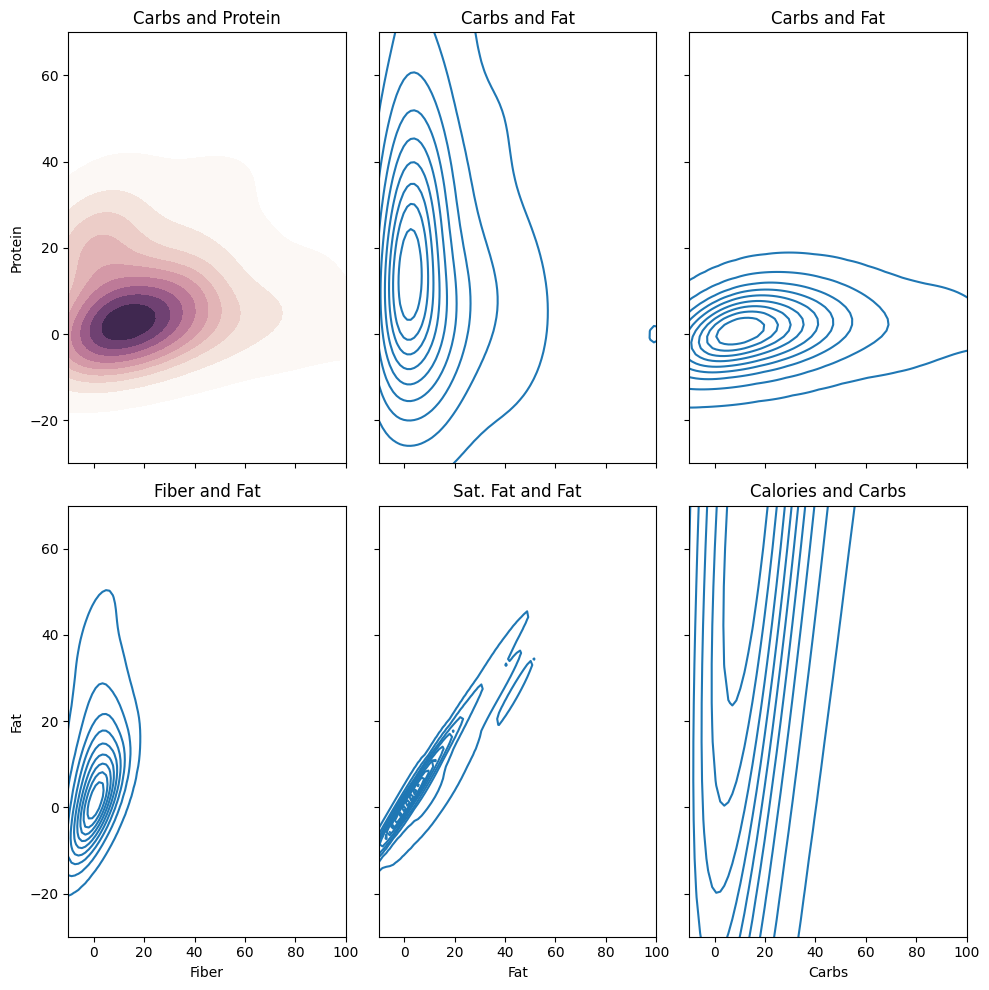

In [ ]:
import matplotlib.pyplot as plt


f, axes = plt.subplots(2, 3, figsize=(10, 10), sharex=True, sharey=True)

s = np.linspace(0, 3, 10)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'],y=nutrients['Protein'],cmap=cmap,shade=True, ax=axes[0,0])
axes[0,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Protein')

cmap = sns.cubehelix_palette(start=0.25, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'],y=nutrients['Carbs'], ax=axes[0,1])
axes[0,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.33, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'],y=nutrients['Fiber'], ax=axes[0,2])
axes[0,2].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Carbs and Fat')

cmap = sns.cubehelix_palette(start=0.45, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fiber'],y=nutrients['Fat'], ax=axes[1,0])
axes[1,0].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Fiber and Fat')

cmap = sns.cubehelix_palette(start=0.56, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Fat'],y=nutrients['Sat.Fat'], ax=axes[1,1])
axes[1,1].set(xlim=(-10, 50), ylim=(-30, 70), title = 'Sat. Fat and Fat')

cmap = sns.cubehelix_palette(start=0.68, light=1, as_cmap=True)

sns.kdeplot(x=nutrients['Carbs'],y=nutrients['Calories'], ax=axes[1,2])
axes[1,2].set(xlim=(-10, 100), ylim=(-30, 70), title = 'Calories and Carbs')

f.tight_layout()

Let's dive into individual metrics:


What is the most protein rich food in the category of vegetables and grains?

In [ ]:
alls=['Vegetables A-E',
 'Vegetables F-P',
 'Vegetables R-Z','Breads cereals fastfoodgrains','Seeds and Nuts']

prot= nutrients[nutrients['Category'].isin(alls)]

protein_rich= prot.sort_values(by='Protein', ascending= False)
top_20=protein_rich.head(20)
fig = px.bar(top_20, x='Food', y='Protein', color='Protein', title=' Top 10 protein rich foods')
fig.show()

Foods to stay away from:

What food has the most calories?

In [ ]:
cals= nutrients.sort_values(by='Calories', ascending= False)
top_20_cals=cals.head(20)
fig = px.bar(top_20, x='Food', y='Calories' , color='Calories',title=' Top 10 calorie rich foods')
fig.show()

Fat Content:

Normally, fat sources are often looked down upon.
 But, a certain amount of fat is required for a healthy gut. Let's look at some fatty foods.

In [ ]:
fats= nutrients.sort_values(by='Fat', ascending= False)
top_20_fat=fats.head(20)
fig = px.bar(top_20_fat, x='Food', y='Calories', color='Calories', title=' Fat Content and Calories')
fig.show()

Analysing categories

Grouping the data into categories can give us the total count of all metrics and thus we can analyse the categories.

In [ ]:
category_dist=nutrients.groupby(['Category']).sum()
category_dist

<ipython-input-33-809a0584fd81>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs
Category,,,,,,,
Breads cereals fastfoodgrains,5253,11921.0,403,207,99.0,115.91,2059.0
Dairy products,7412,8434.0,503,396,322.0,4.40,651.0
Desserts sweets,2958,6608.0,78,163,150.0,20.50,1184.0
DrinksAlcohol Beverages,3284,1112.0,0,0,0.0,0.00,167.0
Fats Oils Shortenings,695,3629.0,234,631,536.0,234.00,239.0
Fish Seafood,1892,2912.0,606,347,252.0,235.00,263.0
Fruits A-F,3844,3328.0,29,20,12.0,33.50,812.0
Fruits G-P,5412,4054.0,28,25,21.0,21.10,1009.0
Fruits R-Z,1973,1228.0,7,1,0.0,17.40,330.0


In [ ]:
category_dist=nutrients.groupby(['Category']).sum()
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=2, cols=3,
    specs=[[{"type": "domain"},{"type": "domain"},{"type": "domain"}],[{"type": "domain"},{"type": "domain"},{"type": "domain"}]])

fig.add_trace(go.Pie(values=category_dist['Calories'].values, title='CALORIES', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=1)

fig.add_trace(go.Pie(values=category_dist['Fat'].values,title='FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=2)
fig.add_trace(go.Pie(values=category_dist['Protein'].values,title='PROTEIN', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=1, col=3)

fig.add_trace(go.Pie(values=category_dist['Fiber'].values,title='FIBER', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=1)

fig.add_trace(go.Pie(values=category_dist['Sat.Fat'].values,title='SAT.FAT', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=2)

fig.add_trace(go.Pie(values=category_dist['Carbs'].values,title='CARBS', labels=category_dist.index,marker=dict(colors=['#100b','#f00560'], line=dict(color='#FFFFFF', width=2.5))),
              row=2, col=3)
fig.update_layout(title_text="Category wise distribution of all metrics",height=700, width=1000)

fig.show()

<ipython-input-34-1a14eb53a801>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Analyzing the Drinks, Alcohol, Beverages and Desserts

In [ ]:
drinks= nutrients[nutrients['Category'].isin(['Fish Seafood','Desserts sweets'])]
drinks_top=drinks.sort_values(by='Calories', ascending= False)
drinks_top=drinks_top.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_top['Calories'].values, text=drinks_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["deepskyblue", "lightsalmon", "tan", "teal", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))



fig.show()

So, pudding has the most amount of calories followed by chocolate fudge.

In [ ]:
drinks_fatty=drinks.sort_values(by='Fat', ascending= False)
drinks_fatty=drinks_fatty.head(10)

fig = go.Figure(go.Funnelarea(values=drinks_fatty['Fat'].values, text=drinks_fatty['Food'],
                              title = { "text": "Desserts with high fat percentage"},
               marker = {"colors": ["blue", "purple", "pink", "teal", "silver","yellow", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Pies and fudges have the highest percentage of fat as well.

Analyzing meat, poultry , seafood.




In [ ]:
meat= nutrients[nutrients['Category'].isin(['Fish Seafood','Meat Poultry'])]
meats_top=drinks.sort_values(by='Protein', ascending= False)
meats_top=meats_top.head(10)

fig = go.Figure(go.Pie(values=meats_top['Protein'].values, text=meats_top['Food'],
                              title = { "text": "Desserts with high calorie percentages"},
               marker = {"colors": ["maroon", "salmon", "tan", "gold", "silver","deepskyblue", "lightsalmon", "tan", "teal", "silver"],
                "line": {"color": ["wheat", "wheat", "blue", "wheat", "wheat","wheat", "wheat", "blue", "wheat", "wheat"]}}))
fig.show()

Oysters have a large amount of proteins, after them the flatfish flounders have about 6.59% protein.

Seafood and meat always is known for having good fat content. Let's find out the fattiest of the fishes

In [ ]:
top_10_fattest= meat.sort_values(by='Fat', ascending=False)
top_10_fattest=top_10_fattest.head(10)
fig = go.Figure(data=[go.Scatter(
    x=top_10_fattest['Food'], y=top_10_fattest['Fat'],
    mode='markers',
    marker_size=[200,180,160,140,120, 100 ,80 , 60 ,40,20])
])
fig.update_layout(title='Meat/Seafood with high Fat Content')
fig.show()

So, only have high protein as well as high fat percentage. Pork sausages are the second highest followed by Roast beef. Also, no type of fish is present in the top 10 fattiest meats list. So, fishes tend to have less fat, I suppose.

Lastly, let us find the meat with most fiber¶

In [ ]:
top_10_fibrous= meat.sort_values(by='Fiber', ascending=False)
top_10_fibrous=top_10_fibrous.head(10)
top_10_fibrous

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
82,Oysters,6-8 med.,230,231.0,232,233,234.0,235.0,236.0,Fish Seafood
42,Salt pork,2 oz.,60,470.0,3,55,NaN,0.0,0.0,Meat Poultry
77,Haddock,3 oz.,85,135.0,16,5,4.0,0.0,6.0,Fish Seafood
68,Pork sausage,3 1/2 oz.,100,475.0,18,44,40.0,0.0,0.0,Meat Poultry
69,Turkey,3 1/2 oz.,100,265.0,27,15,0.0,0.0,0.0,Meat Poultry
70,Veal,3 oz.,85,185.0,23,9,8.0,0.0,0.0,Meat Poultry
71,Roast,3 oz.,85,305.0,13,14,13.0,0.0,0.0,Meat Poultry
72,Clams,3 oz.,85,87.0,12,1,0.0,0.0,2.0,Fish Seafood
73,Cod,3 1/2 oz.,100,170.0,28,5,0.0,0.0,0.0,Fish Seafood
74,Crab meat,3 oz.,85,90.0,14,2,0.0,0.0,1.0,Fish Seafood


Bacon, Halibut, Turkey and veal top the charts in terms of Fiber content.

Introducing 3D Scatter Plots

In [ ]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Fat'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Fat'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Fatty foods (% Daily Value)')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [ ]:
trace1 = go.Scatter3d(
    x=nutrients['Category'].values,
    y=nutrients['Food'].values,
    z=nutrients['Carbs'].values,
    text=nutrients['Food'].values,
    mode='markers',
    marker=dict(
        sizemode='diameter',
         sizeref=750,
        color = nutrients['Carbs'].values,
        colorscale = 'Portland',
        colorbar = dict(title = 'Total Fat (% Daily Value)'),
        line=dict(color='rgb(255, 255, 255)')
    )
)
data=[trace1]
layout=dict(height=800, width=800, title='3D Scatter Plot of Carbohydrate rich food')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

Food group with the most calorie content

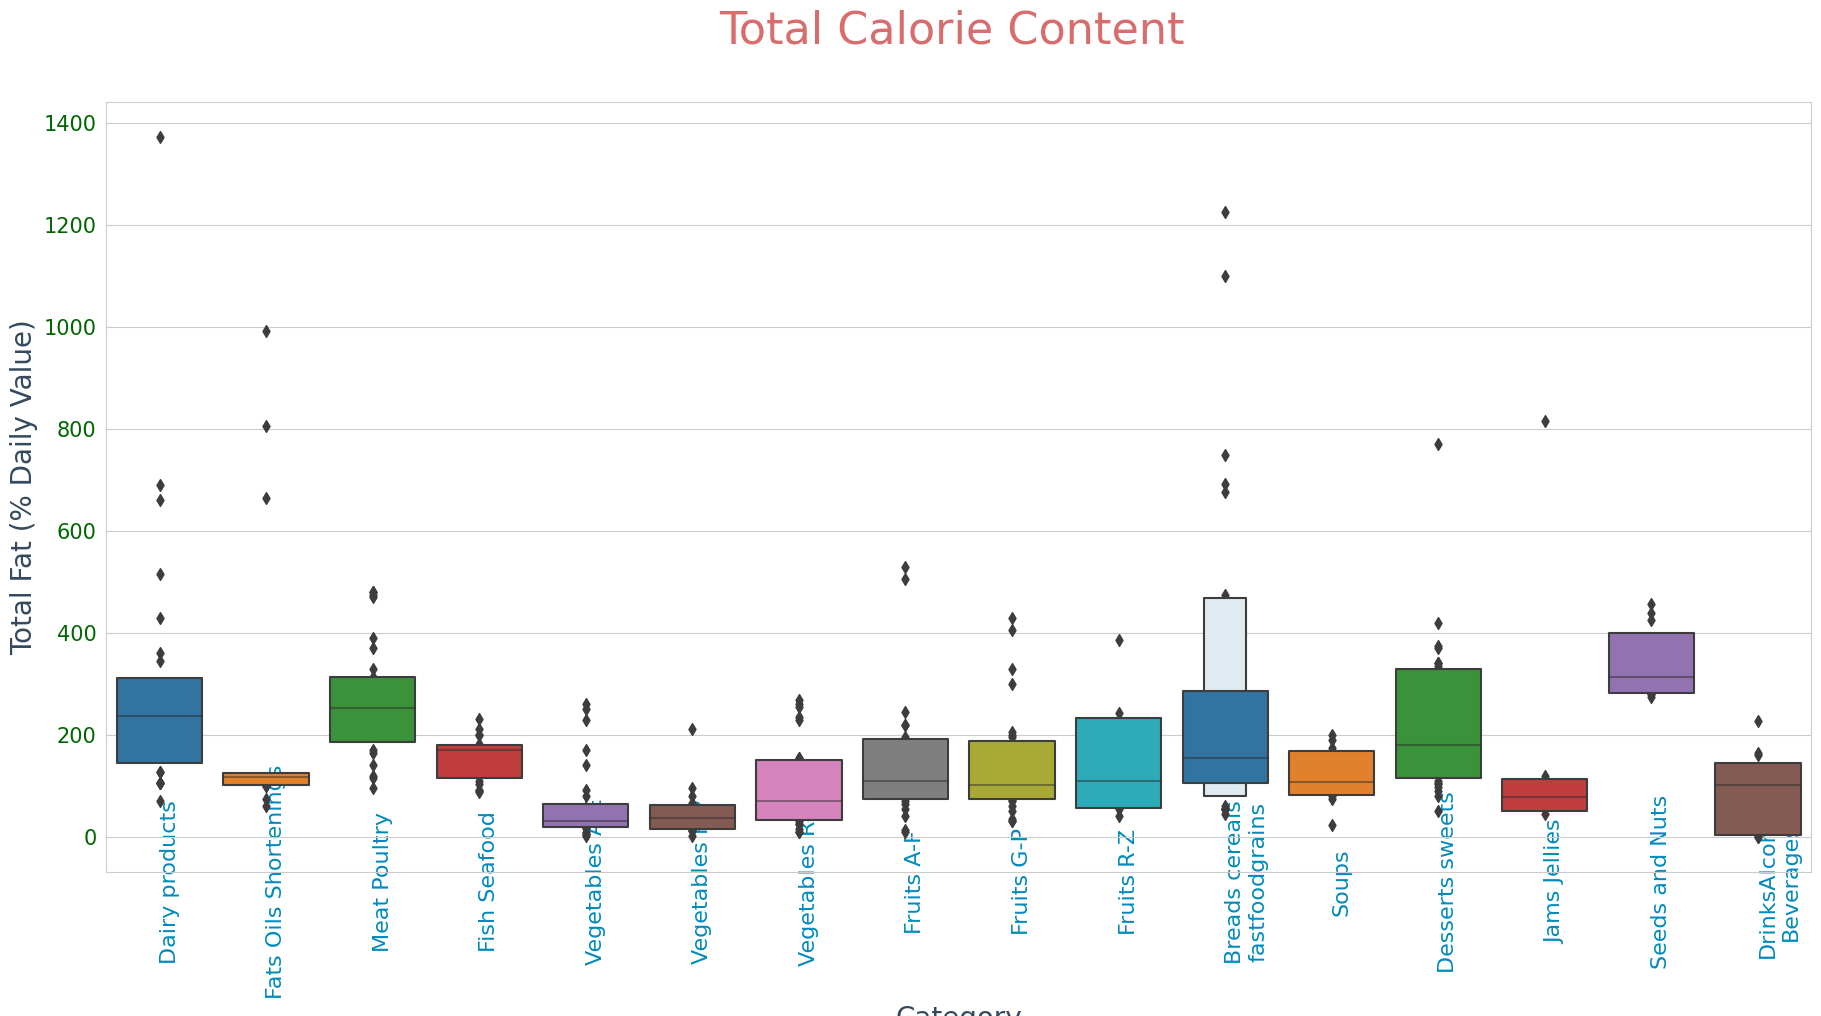

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(22,10))
#plt.figure()

ax = sns.boxenplot(x="Category", y='Calories', data=nutrients, color='#eeeeee', palette="tab10")

# Add transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .9))

#ax = sns.stripplot(x='Category', y='Cholesterol (% Daily Value)', data=menu, color="orange", jitter=0.5, size=5,alpha=0.15)
#
plt.title("Total Calorie Content \n", loc="center",size=32,color='#be0c0c',alpha=0.6)
plt.xlabel('Category',color='#34495E',fontsize=20)
plt.ylabel('Total Fat (% Daily Value)',color='#34495E',fontsize=20)
plt.xticks(size=16,color='#008abc',rotation=90, wrap=True)
plt.yticks(size=15,color='#006600')
plt.show()

 **code-2** (diet planner)

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
df=pd.read_csv("/content/Dataset.csv")

In [6]:
df

,Unnamed: 0,age,weight(kg),height(m),gender,BMI,BMR,activity_level,calories_to_maintain_weight,BMI_tags,Label
0,1,2,16.097862,0.932025,F,18.531612,958.584,1.2,1150.3008,8,13
1,2,4,14.619374,0.916687,F,17.397496,932.383,1.7,1585.0511,7,1
2,4,4,17.899918,0.997288,F,17.997414,977.578,1.9,1857.3982,7,4
3,6,3,13.532880,1.022786,F,12.936609,944.689,1.9,1794.9091,7,3
4,8,4,17.039484,1.053977,M,15.338909,799.229,1.9,1518.5351,7,0
...,...,...,...,...,...,...,...,...,...,...,...
10721,23986,72,95.444236,1.631113,F,35.874169,1510.154,1.3,1963.2002,9,26
10722,23988,85,97.976899,1.631409,F,36.812724,1473.418,1.7,2504.8106,9,30
10723,23994,50,97.761259,1.631864,F,36.711217,1635.925,1.7,2781.0725,9,31
10724,23997,57,96.829324,1.631290,F,36.386871,1593.981,1.3,2072.1753,9,27


In [7]:
new=["age","weight(kg)","height(m)","gender","BMI","BMR"]
df1=df[new]
df1

,age,weight(kg),height(m),gender,BMI,BMR
0,2,16.097862,0.932025,F,18.531612,958.584
1,4,14.619374,0.916687,F,17.397496,932.383
2,4,17.899918,0.997288,F,17.997414,977.578
3,3,13.532880,1.022786,F,12.936609,944.689
4,4,17.039484,1.053977,M,15.338909,799.229
...,...,...,...,...,...,...
10721,72,95.444236,1.631113,F,35.874169,1510.154
10722,85,97.976899,1.631409,F,36.812724,1473.418
10723,50,97.761259,1.631864,F,36.711217,1635.925
10724,57,96.829324,1.631290,F,36.386871,1593.981


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df1["le_age"]=le.fit_transform(df1["age"])
df1["le_weight"]=le.fit_transform(df1["weight(kg)"])
df1["le_height"]=le.fit_transform(df1["height(m)"])
df1["le_gender"]=le.fit_transform(df1["gender"])
df1["le_bmi"]=le.fit_transform(df1["BMI"])
df1["le_bmr"]=le.fit_transform(df1["BMR"])

<ipython-input-10-5ceb7dd21263>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["le_age"]=le.fit_transform(df1["age"])
<ipython-input-10-5ceb7dd21263>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["le_weight"]=le.fit_transform(df1["weight(kg)"])
<ipython-input-10-5ceb7dd21263>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [11]:
df1

,age,weight(kg),height(m),gender,BMI,BMR,le_age,le_weight,le_height,le_gender,le_bmi,le_bmr
0,2,16.097862,0.932025,F,18.531612,958.584,0,358,272,0,2054,635
1,4,14.619374,0.916687,F,17.397496,932.383,2,187,222,0,1575,336
2,4,17.899918,0.997288,F,17.997414,977.578,2,637,417,0,1773,855
3,3,13.532880,1.022786,F,12.936609,944.689,1,102,480,0,152,458
4,4,17.039484,1.053977,M,15.338909,799.229,2,496,561,1,759,118
...,...,...,...,...,...,...,...,...,...,...,...,...
10721,72,95.444236,1.631113,F,35.874169,1510.154,70,9819,4931,0,9852,5658
10722,85,97.976899,1.631409,F,36.812724,1473.418,83,10507,5715,0,10528,4971
10723,50,97.761259,1.631864,F,36.711217,1635.925,48,10443,7029,0,10451,8801
10724,57,96.829324,1.631290,F,36.386871,1593.981,55,10185,5376,0,10206,7834


In [12]:
df_new=df1.drop(new,axis=1)
df_new

,le_age,le_weight,le_height,le_gender,le_bmi,le_bmr
0,0,358,272,0,2054,635
1,2,187,222,0,1575,336
2,2,637,417,0,1773,855
3,1,102,480,0,152,458
4,2,496,561,1,759,118
...,...,...,...,...,...,...
10721,70,9819,4931,0,9852,5658
10722,83,10507,5715,0,10528,4971
10723,48,10443,7029,0,10451,8801
10724,55,10185,5376,0,10206,7834


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


In [14]:
x_train,x_test,y_train,y_test=train_test_split(df_new,df["calories_to_maintain_weight"],test_size=0.2,random_state=42)
len(x_train)

8580

In [15]:
gnb=GaussianNB()
len(y_train)
y_train = y_train.astype(int)

In [16]:
model=gnb.fit(x_train,y_train)

In [17]:
y_pred=model.predict(x_test)
y_pred
y_test_pred=le.fit_transform(y_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test_pred))

0.0


In [19]:
df.columns

Index(['Unnamed: 0', 'age', 'weight(kg)', 'height(m)', 'gender', 'BMI', 'BMR',
       'activity_level', 'calories_to_maintain_weight', 'BMI_tags', 'Label'],
      dtype='object')

In [20]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
features = ['age', 'weight(kg)', 'height(m)', 'BMI', 'BMR']
target = 'calories_to_maintain_weight'

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
len(X_train)

8580

In [24]:
len(y_train)

8580

In [25]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

In [28]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
grid_params = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]}

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(**params),
                           param_grid=grid_params,
                           scoring='neg_mean_squared_error',
                           cv=5)

In [37]:
grid_search.fit(X_train, y_train)


KeyboardInterrupt: ignored

In [ ]:
best_params = grid_search.best_params_
model = xgb.XGBRegressor(**best_params)
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(r2)